# Regresión Lineal

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("datos_producidos/datos_1.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(201, 17)

In [3]:
#son 201 registros con 17 columnas. Veamos los primeros registros
data.head()

,fecha,provincia,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
0,2012-12-31,CHUBUT,BIEDMA,5785,93378,30168,48447,16071,193849,649130.0,19.80,58.06,58.4,46.4,18.1,12.4,6.7
1,2013-12-31,CHUBUT,BIEDMA,5376,82998,25341,47350,26832,187897,620176.0,19.60,56.68,64.7,226.5,19.9,14.2,8.8
2,2014-12-31,CHUBUT,BIEDMA,4785,82706,29379,35155,29900,181925,649130.0,20.10,61.19,60.5,331.3,20.6,14.7,9.2
3,2015-12-31,CHUBUT,BIEDMA,4440,89262,29663,35437,32343,191145,672480.0,18.58,58.18,58.7,114.2,22.2,15.8,10.2
4,2016-12-31,CHUBUT,BIEDMA,4452,82295,33662,33470,21326,175205,653800.0,17.99,59.93,57.5,88.9,25.2,18.6,12.9


In [4]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,7059.592040,117623.000000,39972.074627,42412.358209,35389.223881,242456.233831,8.943014e+05,19.757164,58.265970,53.437313,649.786567,18.934428,11.927114,5.073632
std,6422.172245,96258.454605,38397.581433,36583.899122,35547.605098,209323.799005,8.161410e+05,1.004677,4.311247,10.607092,1232.343900,3.037241,2.382942,2.057974
min,27.000000,768.000000,275.000000,134.000000,34.000000,1771.000000,5.245000e+03,16.880000,47.510000,0.300000,7.100000,10.830000,5.330000,-0.600000
25%,2520.000000,61699.000000,19514.000000,21340.000000,17144.000000,123321.000000,2.602240e+05,19.100000,55.260000,48.800000,155.700000,16.500000,10.070000,3.600000
50%,5785.000000,106471.000000,30119.000000,34584.000000,27014.000000,214592.000000,7.689120e+05,19.770000,59.060000,54.300000,218.000000,19.850000,12.500000,5.300000
75%,8550.000000,150454.000000,46140.000000,52400.000000,41337.000000,287755.000000,1.143408e+06,20.450000,61.660000,59.150000,452.400000,21.000000,13.600000,6.300000
max,26957.000000,443288.000000,175695.000000,147855.000000,159654.000000,921789.000000,4.108800e+06,22.480000,65.450000,77.000000,7288.100000,26.600000,18.600000,12.900000


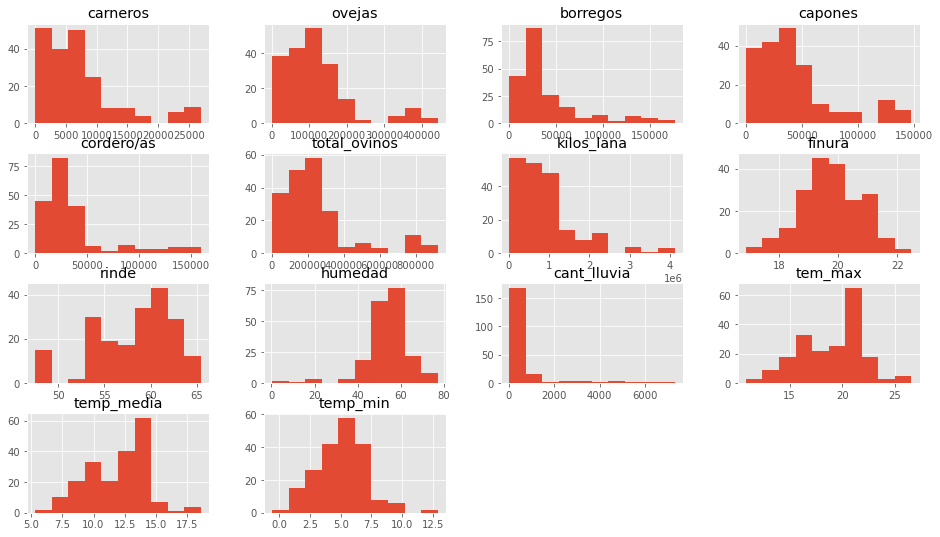

In [5]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

## Matriz de Correlación

<AxesSubplot:>

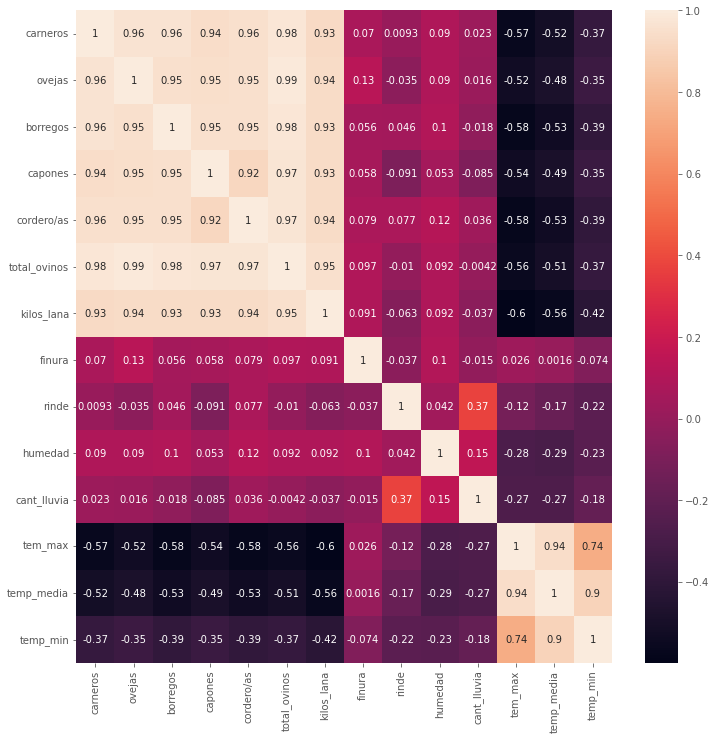

In [6]:
correlation_mat = data.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

# Regresión Lineal Simple

### Predecir a partir de la cantidad de lluvia anual la cantidad de lana producida. Según la matriz estas variables no estan correlacionadas. Tiene un valor de -0.037.

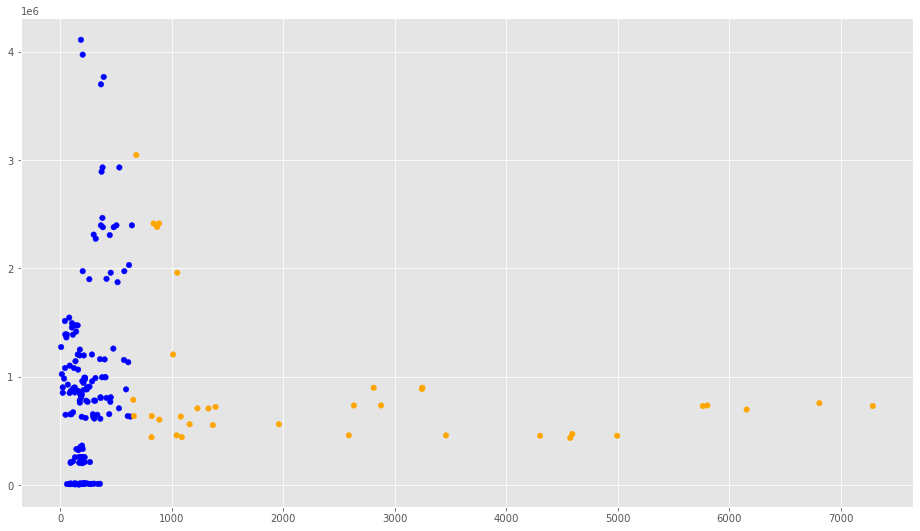

In [9]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['cant_lluvia'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in data.iterrows():
    if(row['cant_lluvia']>649.79):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [11]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["cant_lluvia"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-24.78519678]
Independent term: 
 910406.5133040557
Mean squared error: 661843963213.57
Variance score: 0.00


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 7.61 y el término independiente “b” es 10429,31. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

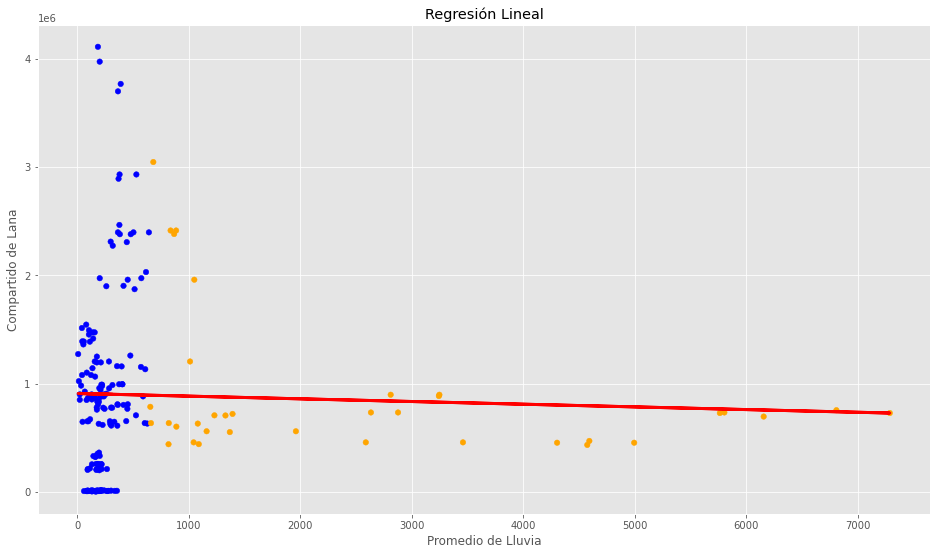

In [12]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Promedio de Lluvia')
plt.ylabel('Compartido de Lana')
plt.title('Regresión Lineal')

plt.show()

In [13]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener por un promedio de lluvia de 200,
# según nuestro modelo, hacemos:
y_p = regr.predict([[200]])
print(round(float(y_p),2))

905449.47


In [ ]:
data.shape

### Predecir a partir de la cantidad de lluvia el rinde de la lana producida. Según la matriz estas variables no estan correlacionadas o tienen una muy baja correlacion. Tiene un valor de 0.37.

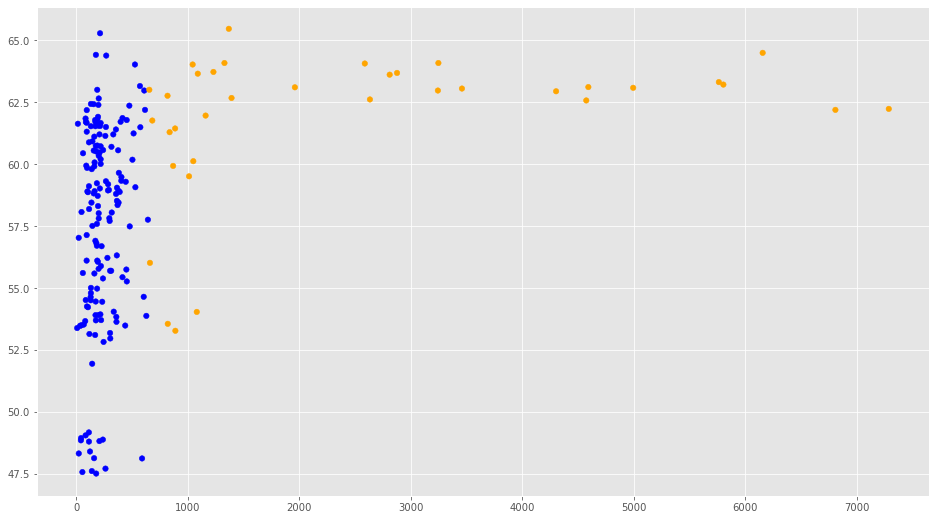

In [14]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['cant_lluvia'].values
f2 = data['rinde'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Radiacion Solar
asignar=[]
for index, row in data.iterrows():
    if(row['cant_lluvia']>649.79):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [15]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["cant_lluvia"]]
X_train = np.array(dataX)
y_train = data['rinde'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.00130002]
Independent term: 
 57.421234645514296
Mean squared error: 15.94
Variance score: 0.14


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente -0.0009 y el término independiente “b” es 23.44. Tenemos un Error Cuadrático de 0.4… por lo que este modelo deberia ser mejor que el anterior, pero maso menos igual. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

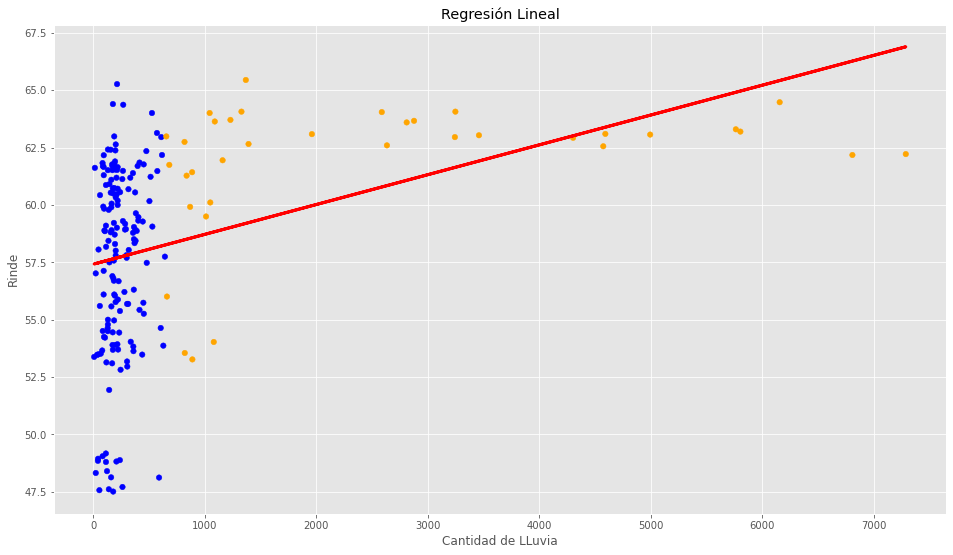

In [16]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de LLuvia')
plt.ylabel('Rinde')
plt.title('Regresión Lineal')

plt.show()

In [17]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener con una radicion solar de 4589,
# según nuestro modelo, hacemos:
y_p = regr.predict([[651]])
print(round(float(y_p),2))

58.27


In [ ]:
data.shape

### Predecir a partir de la temperatura máxima la cantidad de lana producida. Según la matriz estas variables tienen una baja correlación. Tiene un valor de -0.6.

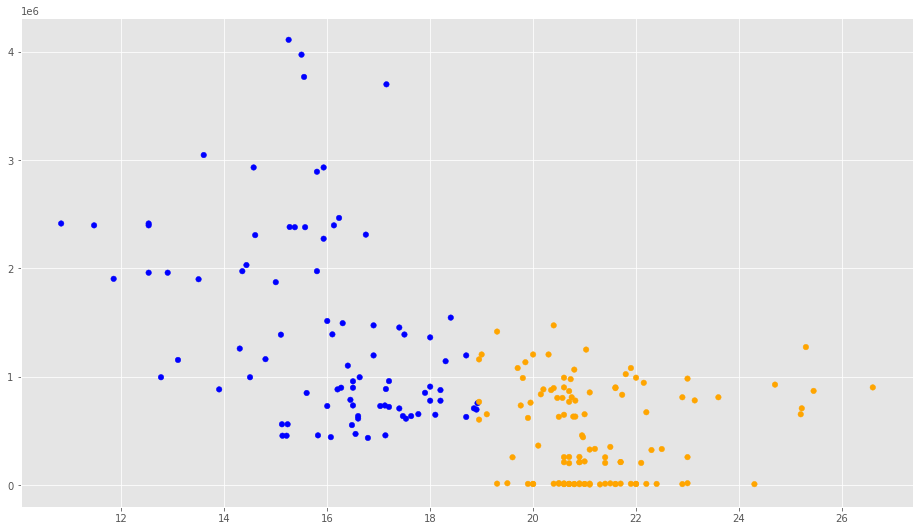

In [18]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['tem_max'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de acumulado de lluvia anual
asignar=[]
for index, row in data.iterrows():
    if(row['tem_max']>18.93):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [19]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["tem_max"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-160858.06087173]
Independent term: 
 3940056.7747604903
Mean squared error: 425264251806.84
Variance score: 0.36


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 7.64 y el término independiente “b” es 10427,51. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

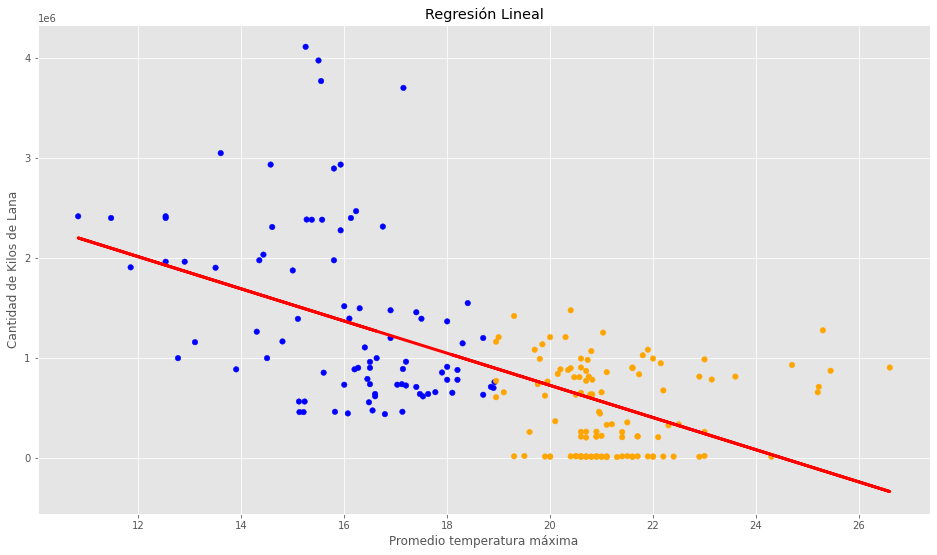

In [20]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Promedio temperatura máxima')
plt.ylabel('Cantidad de Kilos de Lana')
plt.title('Regresión Lineal')

plt.show()

In [21]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener con un acumulado de lluvia de 189,
# según nuestro modelo, hacemos:
y_p = regr.predict([[15.6]])
print(round(float(y_p),2))

1430671.03


In [ ]:
data.shape

### Predecir a partir de la cantidad de ovinos la cantidad de lana producida. Según la matriz estas variables estan correlacionadas. Tiene un valor de 0.95.

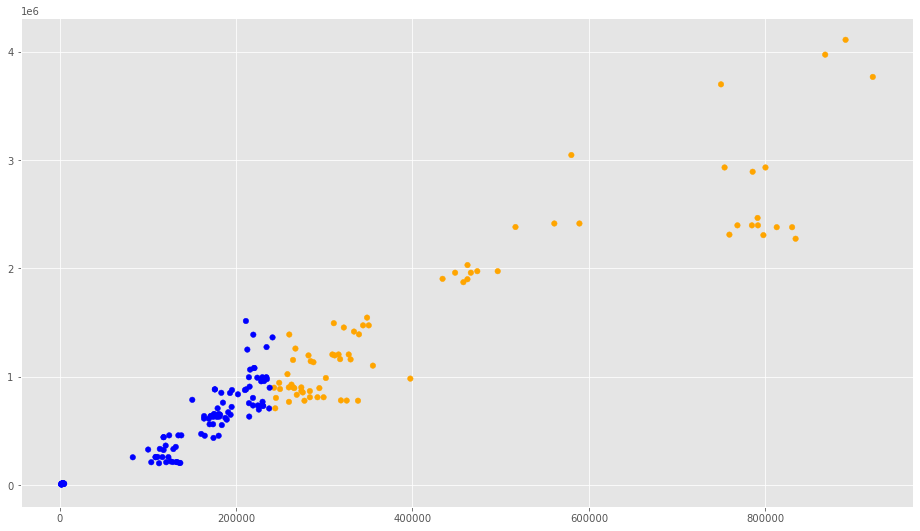

In [7]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['total_ovinos'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de acumulado de lluvia anual
asignar=[]
for index, row in data.iterrows():
    if(row['total_ovinos']>242456.23):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [8]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["total_ovinos"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [3.71273343]
Independent term: 
 -5873.938773002592
Mean squared error: 61794088957.09
Variance score: 0.91


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente -12.41 y el término independiente “b” es 12428,07. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

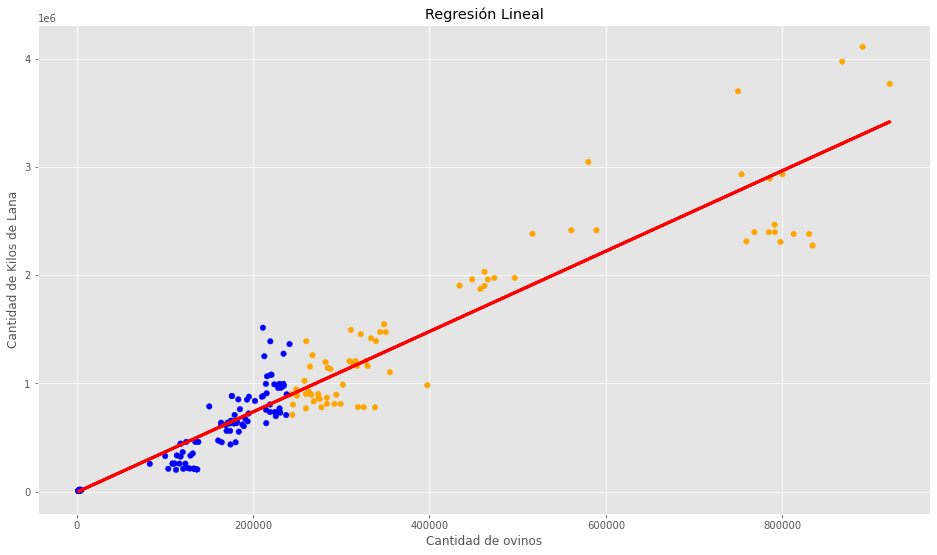

In [9]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de ovinos')
plt.ylabel('Cantidad de Kilos de Lana')
plt.title('Regresión Lineal')

plt.show()

In [10]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener con un acumulado de lluvia de 189,
# según nuestro modelo, hacemos:
y_p = regr.predict([[5000]])
print(round(float(y_p),2))

12689.73


In [38]:
data.shape

(165, 17)

### Predecir a partir de la cantidad de ovinos la cantidad de borregos. Según la matriz estas variables estan correlacionadas positivamente. Tiene un valor de 0.98.

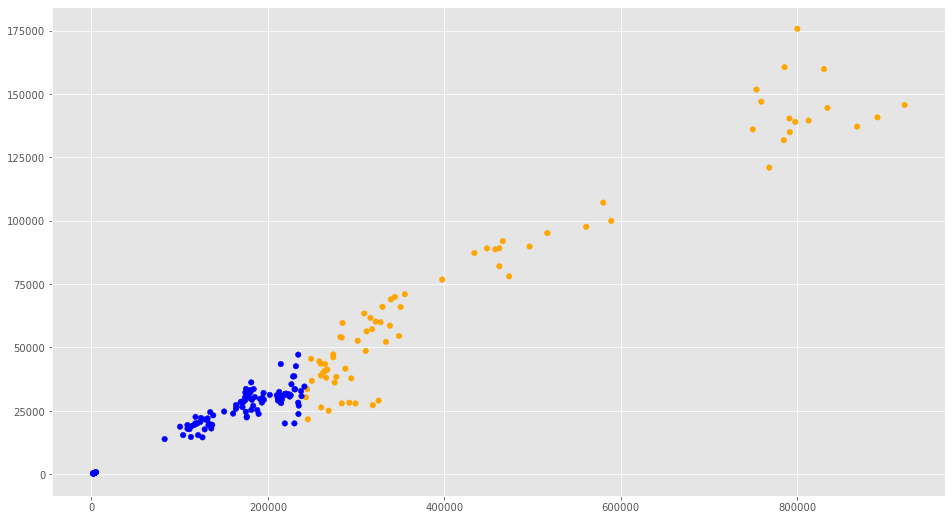

In [11]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['total_ovinos'].values
f2 = data['borregos'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de animales
asignar=[]
for index, row in data.iterrows():
    if(row['total_ovinos']>242456.23):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [12]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["total_ovinos"]]
X_train = np.array(dataX)
y_train = data['borregos'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.17948453]
Independent term: 
 -3545.068066070402
Mean squared error: 62527921.56
Variance score: 0.96


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 2.65 y el término independiente “b” es -4096.73. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

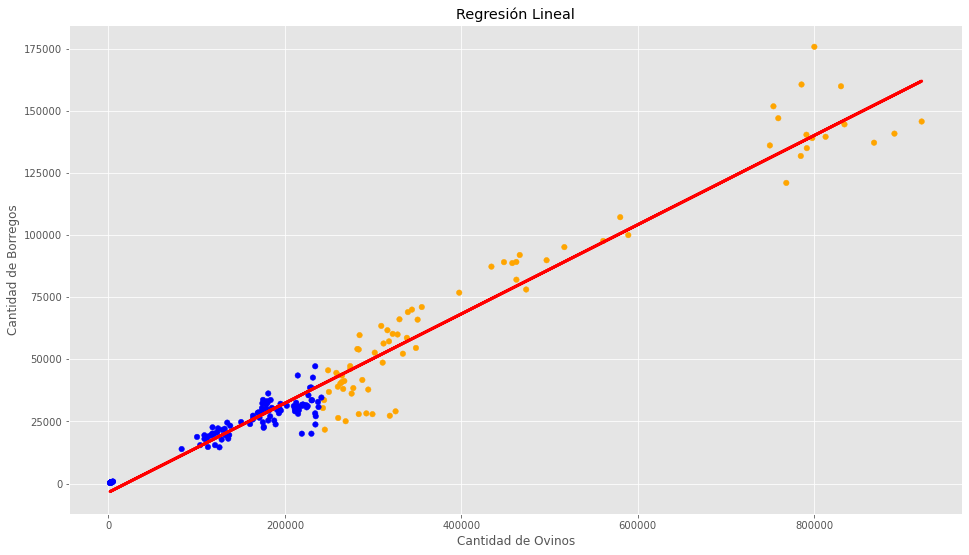

In [13]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Ovinos')
plt.ylabel('Cantidad de Borregos')
plt.title('Regresión Lineal')

plt.show()

In [14]:
# Vamos a comprobar:
# Quiero predecir cuántos borregos voy a obtener con una cantidad de animales de 3783,
# según nuestro modelo, hacemos:
y_p = regr.predict([[3783]])
print(round(float(y_p),0))

-2866.0


### Predecir a partir de la cantidad de ovejas la cantidad de corderos. Según la matriz estas variables estan correlacionadas positivamente. Tiene un valor de 0.95.

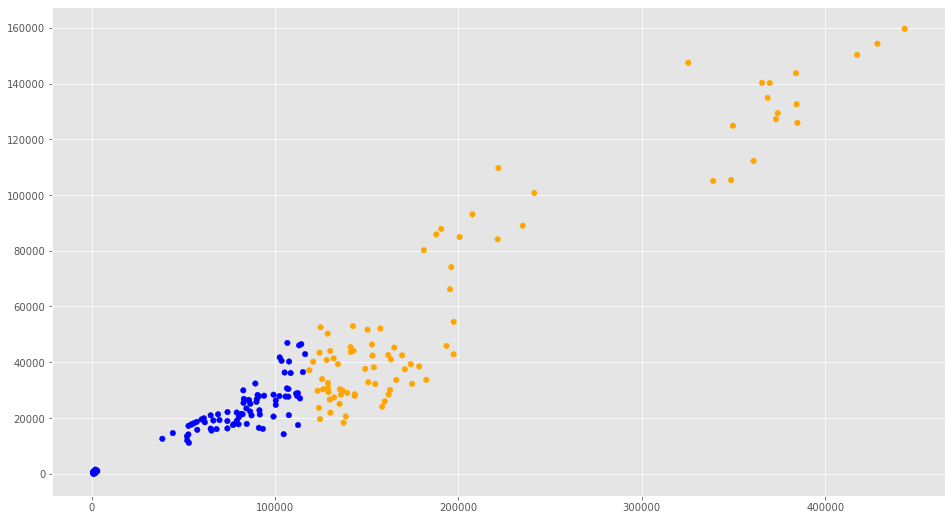

In [15]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['ovejas'].values
f2 = data['cordero/as'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de animales
asignar=[]
for index, row in data.iterrows():
    if(row['ovejas']>117623):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [17]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["ovejas"]]
X_train = np.array(dataX)
y_train = data['cordero/as'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.35186743]
Independent term: 
 -5998.479214829327
Mean squared error: 115861433.48
Variance score: 0.91


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.37 y el término independiente “b” es -36.48. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

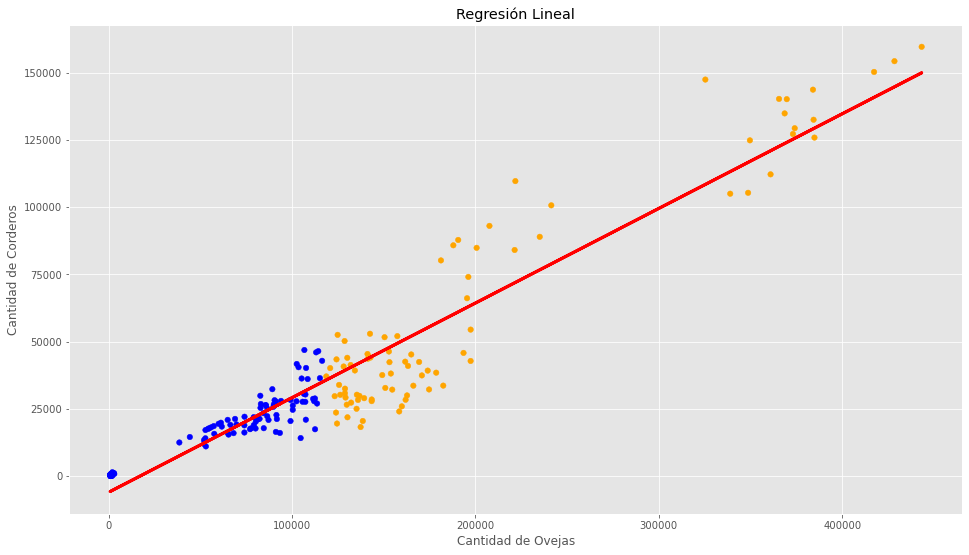

In [18]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Ovejas')
plt.ylabel('Cantidad de Corderos')
plt.title('Regresión Lineal')

plt.show()

In [19]:
# Vamos a comprobar:
# Quiero predecir cuántos corderos voy a obtener con una cantidad de ovejas de 2566,
# según nuestro modelo, hacemos:
y_p = regr.predict([[2566]])
print(round(float(y_p),2))

-5095.59
